In [15]:
import pytesseract
import imutils
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import time
import easyocr
from PIL import ImageFont, ImageDraw, Image
import arabic_reshaper 
from bidi.algorithm import get_display
import os
os.chdir(r'C:\Users\DR\Downloads')

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

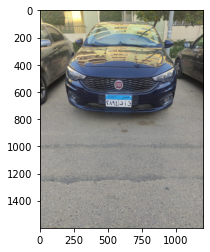

In [3]:
img = cv2.imread('car1.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

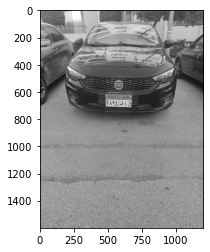

In [4]:
img = cv2.imread('car1.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

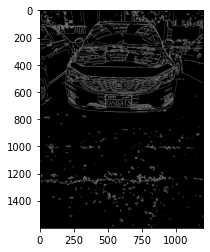

In [5]:
btfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edges = cv2.Canny(btfilter,30,200)
#plt.imshow(cv2.cvtColor(btfilter, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
#print(contours)
len(contours)

10

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location)        

4

In [8]:
location

array([[[482, 656]],

       [[668, 660]],

       [[667, 711]],

       [[487, 707]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

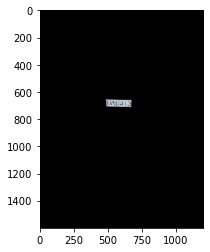

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

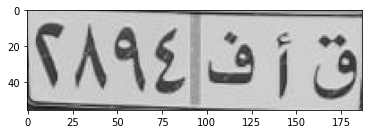

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [16]:
reader = easyocr.Reader(['ar'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[0, 0], [187, 0], [187, 56], [0, 56]], 'ق أف ٢٨٩٤', 0.9678725466395195]]

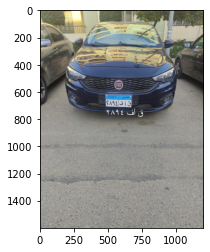

In [17]:
text = result[0][-2]
font = ImageFont.truetype("arial.ttf", 64)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text) 
draw = ImageDraw.Draw(img_pil)
draw.text((approx[0][0][0], approx[1][0][1]+60),bidi_text, font = font)
img = np.array(img_pil)
cv2.imshow("image with arabic", img) 
cv2.waitKey(0)
cv2.destroyAllWindows()


#res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=5, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
#res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))